# Part 3.1: Unsupervised Learning - k-Means Clustering

Clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other than to those in other clusters.

**k-Means** is one of the most popular and simplest clustering algorithms. It aims to partition 'n' observations into 'k' clusters in which each observation belongs to the cluster with the nearest mean (cluster center or centroid).

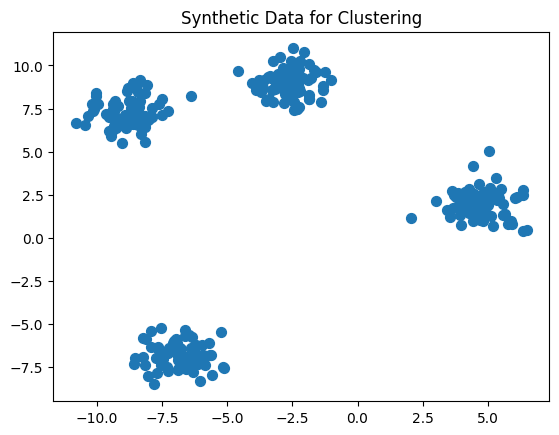

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Generate synthetic data with clear clusters
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Synthetic Data for Clustering')
plt.show()

### Training a k-Means Model

In [2]:
# n_clusters is 'k'
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

### Visualizing the Clusters

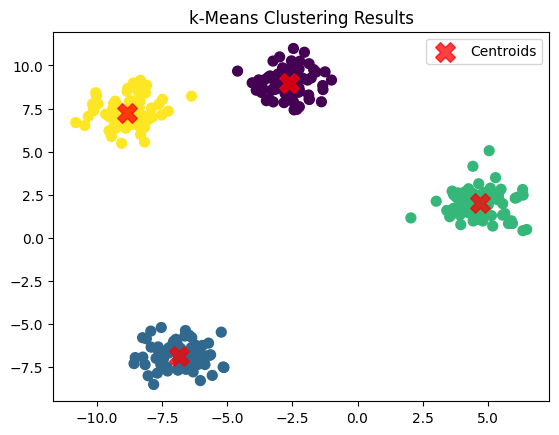

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title('k-Means Clustering Results')
plt.legend()
plt.show()

### Choosing the Right Number of Clusters (k)
The most challenging part of k-Means is choosing 'k'. Two common methods are:

#### 1. The Elbow Method
We plot the model's inertia (sum of squared distances of samples to their closest cluster center) for different values of 'k'. The 'elbow' in the plot—the point where the rate of decrease sharply changes—is a good estimate for 'k'.

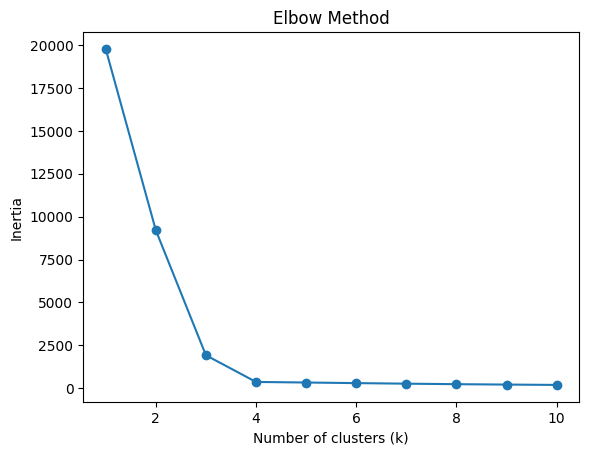

The elbow appears to be at k=4.


In [4]:
inertia = []
for k in range(1, 11):
    kmeans_k = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_k.fit(X)
    inertia.append(kmeans_k.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()
print("The elbow appears to be at k=4.")

#### 2. Silhouette Score
The silhouette score measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [6]:
import numpy as np

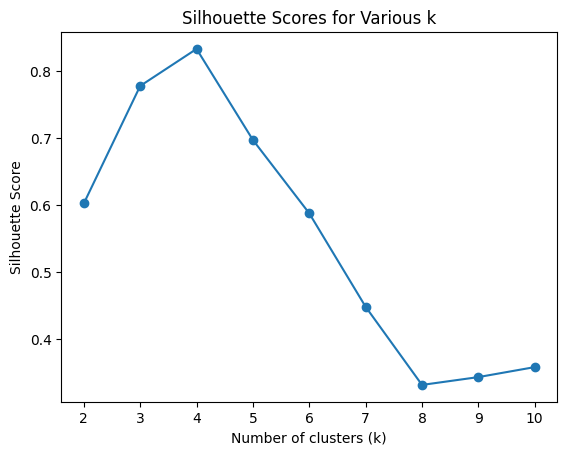

The peak silhouette score is at k=4.


In [7]:
silhouette_scores = []
for k in range(2, 11):
    kmeans_k = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans_k.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()
print(f"The peak silhouette score is at k={np.argmax(silhouette_scores) + 2}.")